# 11. Segmentation: Clustering and Classification

Segmentation is not a well-defined process and analysts vary in their definitions of
segmentation as well as their approaches and philosophy.

We start with a warning: we have definite opinions about segmentation and what we
believe are common misunderstandings and poor practices.We hope you’ll be convinced
by our views—but even if not, the methods here will be useful to you.

## 11.1 Segmentation Philosophy

The general goal of market segmentation is to find groups of customers that differ in
important ways associated with product interest, market participation, or response
to marketing efforts.
- By understanding the differences among groups, a marketer
can make better strategic choices about opportunities, product definition, and positioning,
and can engage in more effective promotion.

### 11.1.1 The Difficulty of Segmentation

It is not particularly difficult to find groups within consumer data; indeed,
in this chapter we see several ways to do this, all of which “succeed” according to
one statistical criterion or another. Rather, the difficulty is to ensure that the outcome
is meaningful for a particular business need.
 - For segmentation this means that there is no all-purpose method or
algorithm that is a priori preferable to others. This does not mean that the choice of a
method is irrelevant or arbitrary; 
 - rather, one cannot necessarily determine in advance
which approach will work best for a novel problem. As a form of optimization,
segmentation is likely to require an iterative approach that successively tests and
improves its answer to a business need.

Segmentation is like slicing a pie, and any pie might be sliced in an infinite number
of ways. 
 - Your task as an analyst is to consider the infinity of possible data that
might be gathered, the infinity of possible groupings of that data, and the infinity of
possible business questions that might be addressed. 
 - Your goal is to find a solution
within those infinities that represents real differences in the data and that informs
and influences real business decisions.

To maximize chances of finding such a model, we recommend that an analyst
expects—and prepares management to understand—the need to iterate analyses.

### 11.1.2 Segmentation as Clustering and Classification

***clustering or cluster analysis and classification***. These are the primary branches of
what is sometimes called statistical learning, i.e., learning from data through statistical
model fitting.

## 11.2 Segmentation Data

In [9]:
seg.raw = read.csv("http://goo.gl/qw303p")
(seg.df  = seg.raw[, -7])              # remove the known segment assignments

age,gender,income,kids,ownHome,subscribe
47.31613,Male,49482.81,2,ownNo,subNo
31.38684,Male,35546.29,1,ownYes,subNo
43.20034,Male,44169.19,0,ownYes,subNo
37.31700,Female,81041.99,1,ownNo,subNo
40.95439,Female,79353.01,3,ownYes,subNo
43.03387,Male,58143.36,4,ownYes,subNo
37.55696,Male,19282.23,3,ownNo,subNo
28.45129,Male,47245.24,0,ownNo,subNo
44.20268,Female,48332.52,1,ownNo,subNo
35.15167,Female,52567.89,0,ownYes,subNo


> this is a simulated data set with four identified segments
of customers for a subscription product, and contains a few variables that are
similar to data from typical consumer surveys. Each observation has the simulated
respondent’s age, gender, household income, number of kids, home ownership, subscription
status, and assigned segment membership.
- The original data seg.raw contains “known” segment assignments that have been
provided for the data from some other source. 
- Because our task here is to discover segments, we create a copy
seg.df that omits those assignments (omitting column 7), so we don’t accidentally
include the known values when exploring applying segmentation methods.

In [10]:
summary(seg.df)

      age           gender        income            kids        ownHome   
 Min.   :19.26   Female:157   Min.   : -5183   Min.   :0.00   ownNo :159  
 1st Qu.:33.01   Male  :143   1st Qu.: 39656   1st Qu.:0.00   ownYes:141  
 Median :39.49                Median : 52014   Median :1.00               
 Mean   :41.20                Mean   : 50937   Mean   :1.27               
 3rd Qu.:47.90                3rd Qu.: 61403   3rd Qu.:2.00               
 Max.   :80.49                Max.   :114278   Max.   :7.00               
  subscribe  
 subNo :260  
 subYes: 40  
             
             
             
             

## 11.3 Clustering

To begin, we review two distance-based clustering methods, hclust() and
kmeans(). 
 - Distance-based methods attempt to find groups that minimize the distance
between members within the group, while maximizing the distance of members
from other groups. 
 - hclust() does this by modeling the data in a tree structure,
while kmeans() uses group centroids (central points).

Then we examine model-based clustering methods, Mclust() and poLCA().
Model-based methods view the data as a mixture of groups sampled from different
distributions, but whose original distribution and group membership has been “lost”
(i.e., is unknown). These methods attempt to model the data such that the observed
variance can be best represented by a small number of groups with specific distribution
characteristics such as different means and standard deviations. 
 - Mclust()
models the data as a mixture of Gaussian (normal) variables, while poLCA() uses
a latent class model with categorical (nominal) variables.

### 11.3.1 The Steps of Clustering

Clustering analysis requires two stages: finding a proposed cluster solution and evaluating
that solution for one’s business needs. For each method we go through the
following steps:
 - Transform the data if needed for a particular clustering method; for instance,
some methods require all numeric data (e.g., kmeans(), mclust()) or all
categorical data (e.g., poLCA()).
 - Compute a distance matrix if needed; some methods require a precomputed
matrix of similarity in order to group observations (e.g., hclust()) .
 - Apply the clustering method and save its result to an object. For some methods
this requires specifying the number (K) of groups desired (e.g., kmeans(),
poLCA()).
 - For some methods, further parse the object to obtain a solution with K groups
(e.g., hclust()).
 - Examine the solution in the model object with regard to the underlying data,
and consider whether it answers a business question.


#### 11.3.1.1. A Quick Check Function

A segment inspection function may be complex depending on the business need and
might even include plotting as well as data summarization. For purposes here we use
a simple function that reports the mean by group.

In [11]:
seg.summ = function(data, groups) {
  aggregate(data, list(groups), function(x) mean(as.numeric(x)))
}

> This function first splits the data by reported group (aggregate(. . ., list
(groups), . )). An anonymous function (function(x) . . . ) then converts
all of a group’s data to numeric (as.numeric(x)) and computes its mean().

With a summary function of this kind we are easily able to answer the following
questions related to the business value of a proposed solution:
- Are there obvious differences in group means?
- Does the differentiation point to some underlying story to tell?
- Do we see immediately odd results such as a mean equal to the value of one
data level?

In [12]:
seg.summ(seg.df, seg.raw$Segment)

Group.1,age,gender,income,kids,ownHome,subscribe
Moving up,36.33114,1.30,53090.97,1.914286,1.328571,1.200
Suburb mix,39.92815,1.52,55033.82,1.920000,1.480000,1.060
Travelers,57.87088,1.50,62213.94,0.000000,1.750000,1.125
Urban hip,23.88459,1.60,21681.93,1.100000,1.200000,1.200


In [13]:
# Why not use a standard R function such as by() or aggregate()?

aggregate(.~ seg.raw$Segment, data = seg.df, FUN=mean)

seg.raw$Segment,age,gender,income,kids,ownHome,subscribe
Moving up,36.33114,1.30,53090.97,1.914286,1.328571,1.200
Suburb mix,39.92815,1.52,55033.82,1.920000,1.480000,1.060
Travelers,57.87088,1.50,62213.94,0.000000,1.750000,1.125
Urban hip,23.88459,1.60,21681.93,1.100000,1.200000,1.200


### 11.3.2 Hierarchical Clustering: hclust() Basics

Hierarchical clustering is a popular method that groups observations according to
their similarity. The hclust() method is one way to perform this analysis in R.
 - hclust() is a distance-based algorithm that operates on a ***dissimilarity *** matrix, an
N-by-N matrix that reports a metric for the distance between each pair of observations.

The hierarchical clustering method begins with each observation in its own cluster.
It then successively joins neighboring observations or clusters one at a time according
to their distances from one another, and continues this until all observations
are linked. 
- This process of repeatedly joining observations and groups is known as
an ***agglomerative*** method. Because it is both very popular and exemplary of other
methods, we present hierarchical clustering in more detail than the other clustering
algorithms.

The primary information in hierarchical clustering is the distance between observations.
 - There are many ways to compute distance, and we start by examining the
best-known method, the Euclidean distance. For two observations (vectors) X and
Y, the Euclidean distance d is:

<p style="text-align: center;"> $d = \sqrt{\sum(X-Y)^2}$ </p>


For single pairs of observations, such as X = {1,2,3} and Y = {2,3,2} we can
compute the distance easily in R:

In [14]:
c(1,2,3) - c(2,3,2)                  # vector of differences
sum((c(1,2,3) - c(2,3,2))^2)         # the sum of squared differences
sqrt(sum((c(1,2,3) - c(2,3,2))^2))   # root sum of squares

[1] -1 -1  1

[1] 3

[1] 1.732051

When there are many pairs, this can be done with the dist() function. Let’s check
it first for the simple X,Y example, using rbind() to group these vectors as observations
(rows):

In [15]:
dist(rbind(c(1,2,3), c(2,3,2)))

         1
2 1.732051

> The row and column labels tell us that dist() is returning a matrix for observation
1 (column) by observation 2 (row).

In [16]:
#if cbind()?
dist(cbind(c(1,2,3), c(2,3,2)))

         1        2
2 1.414214         
3 2.000000 1.414214

A limitation is that Euclidean distance is only defined when observations are numeric If we did
not care about the factor variables, then we could compute Euclidean distance using
only the numeric columns.
- For example, we can select the three numeric columns in seg.df, calculate the distances,
and then look at a matrix for just the first five observations as follows:

In [17]:
d = dist(seg.df[, c("age", "income", "kids")])
as.matrix(d)[1:5, 1:5]

,1,2,3,4,5
1,0.000,13936.531,5313.626,31559.178,29870.205
2,13936.531,0.000,8622.906,45495.698,43806.727
3,5313.626,8622.906,0.000,36872.800,35183.828
4,31559.178,45495.698,36872.800,0.000,1688.977
5,29870.205,43806.727,35183.828,1688.977,0.000


For seg.df we cannot assume that factor variables are irrelevant to our cluster
definitions; ***it is better to use all the data. ***
- The daisy() function in the cluster
package [108] works with mixed data types by rescaling the values, so we use that
instead of Euclidean distance:

In [18]:
library(cluster)            # daisy works with mixed data types

In [19]:
seg.dist = daisy(seg.df)
as.matrix(seg.dist)[1:5, 1:5]

,1,2,3,4,5
1,0.0000000,0.2532815,0.2329028,0.2617250,0.4161338
2,0.2532815,0.0000000,0.0679978,0.4129493,0.3014468
3,0.2329028,0.0679978,0.0000000,0.4246012,0.2932957
4,0.2617250,0.4129493,0.4246012,0.0000000,0.2265436
5,0.4161338,0.3014468,0.2932957,0.2265436,0.0000000


> We inspect the distances computed by daisy() by coercing the resulting object to
a matrix and selecting the first few rows and columns:
 - The distances look reasonable (zeroes on the diagonal, symmetric, scaled [0, 1]) 

So
we proceed to the hierarchical cluster method itself, invoking hclust() on the
dissimilarity matrix:

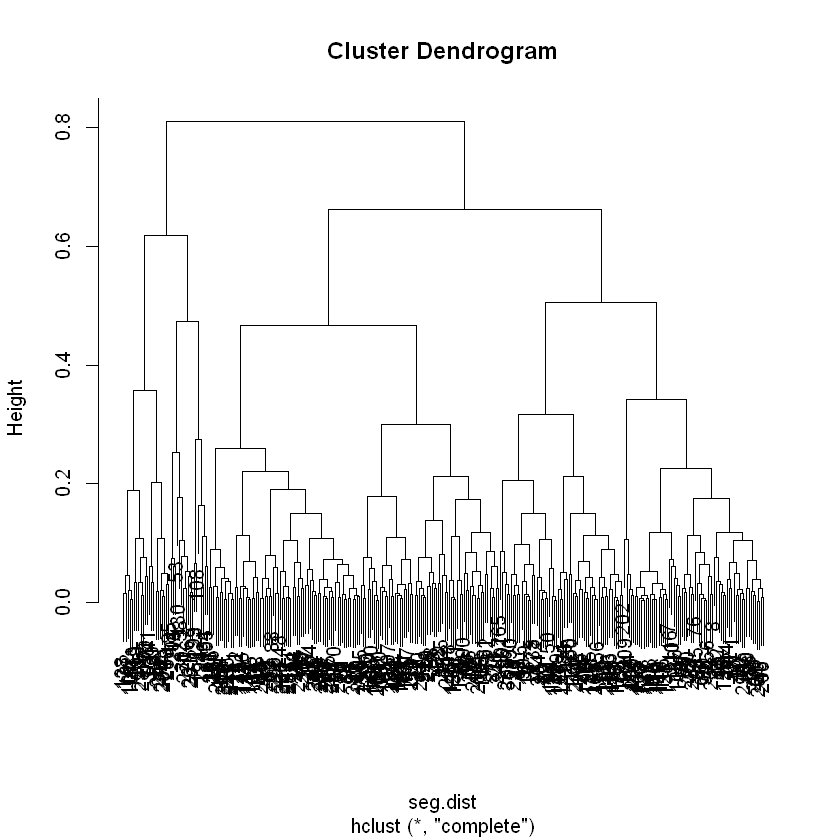

In [20]:
seg.hc = hclust(seg.dist, method="complete")
plot(seg.hc)

We use the complete linkage method, which evaluates the distance between every
member when combining observations and groups.
- The resulting tree for all N = 300 observations of seg.df is shown in
Fig. 11.1.

A hierarchical dendrogram is interpreted primarily by height and where observations
are joined. The height represents the dissimilarity between elements that are
joined.
- At the lowest level of the tree in Fig. 11.1 we see that elements are combined
into small groups of 2–10 that are relatively similar, and then those groups are
successively combined with less similar groups moving up the tree.
- The horizontal
ordering of branches is not important; branches could exchange places with no
change in interpretation.

Figure 11.1 is difficult to read, so it is helpful to zoom in on one section of the chart.
- We can cut it at a specified location and plot just one branch as follows.We coerce it
to a dendrogram object (as.dendrogram(. . . )), cut it at a certain height (h=. . . ),
and select the resulting branch that we want (. . . $lower[[1]]).

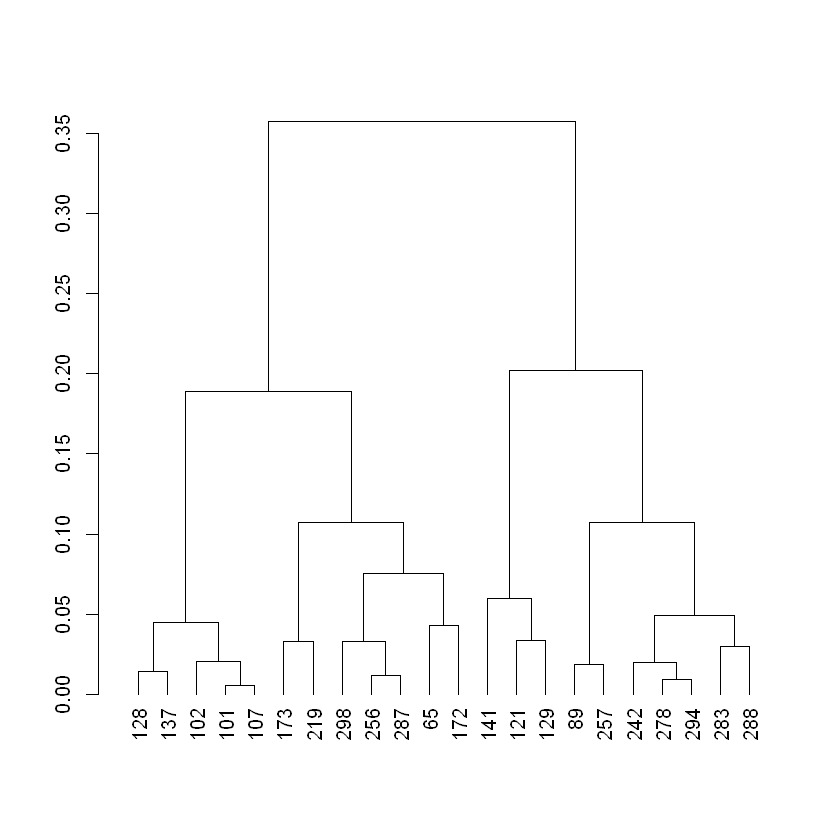

In [21]:
plot(cut(as.dendrogram(seg.hc), h=0.5)$lower[[1]])

> The result is shown in Fig. 11.2, where we are now able to read the observation labels
(which defaults to the row names—usually the row numbers—of observations
in the data frame). Each node at the bottom represents one customer, and the brackets
show how each has been grouped progressively with other customers.
- We can check the similarity of observations by selecting a few rows listed in
Fig. 11.2. Observations 101 and 107 are represented as being quite similar because
they are linked at a very low height, as are observations 278 and 294. On the other
hand, observations 173 and 141 are only joined at the highest level of this branch
and thus should be relatively dissimilar.

In [22]:
seg.df[c(101, 107), ]                # similar
seg.df[c(278, 294), ]                # similar
seg.df[c(173, 141), ]                # less similar

,age,gender,income,kids,ownHome,subscribe
101,24.73796,Male,18457.85,1,ownNo,subYes
107,23.19013,Male,17510.28,1,ownNo,subYes


,age,gender,income,kids,ownHome,subscribe
278,36.23860,Female,46540.88,1,ownNo,subYes
294,35.79961,Female,52352.69,1,ownNo,subYes


,age,gender,income,kids,ownHome,subscribe
173,64.70641,Male,45517.15,0,ownNo,subYes
141,25.17703,Female,20125.80,2,ownNo,subYes


>The first two sets—observations that are neighbors in the dendrogram—are similar
on all variables (age, gender, income, etc.). The third set—observations taken from
widely separated branches—differs substantially on the first four variables.

Finally, we might check one of the goodness-of-fit metrics for a hierarchical cluster
solution. 
 - One method is the cophenetic correlation coefficient (CPCC), which
assesses how well a dendrogram (in this case seg.hc) matches the true distance
metric (seg.dist) [145]. We use cophenetic() to get the distances from the
dendrogram, and compare it to the dist() metrics with cor():

In [23]:
cor(cophenetic(seg.hc), seg.dist)

[1] 0.7682436

> CPCC is interpreted similarly to Pearson’s r. In this case, CPCC > 0.7 indicates
a relatively strong fit, meaning that the hierarchical tree represents the distances
between customers well.

### 11.3.3 Hierarchical Clustering Continued: Groups from hclust()

How do we get specific segment assignments? A dendrogram can be cut into clusters
at any height desired, resulting in different numbers of groups. 
 - For instance, if
Fig. 11.1 is cut at a height of 0.7, there are K = 2 groups (draw a horizontal line at
0.7 and count how many branches it intersects; each cluster below is a group), while
cutting at height of 0.4 defines K = 7 groups.

We can see where the dendrogram would be cut by overlaying
its plot() with rect.hclust(), specifying the number of groups we want
(k=. . . ):

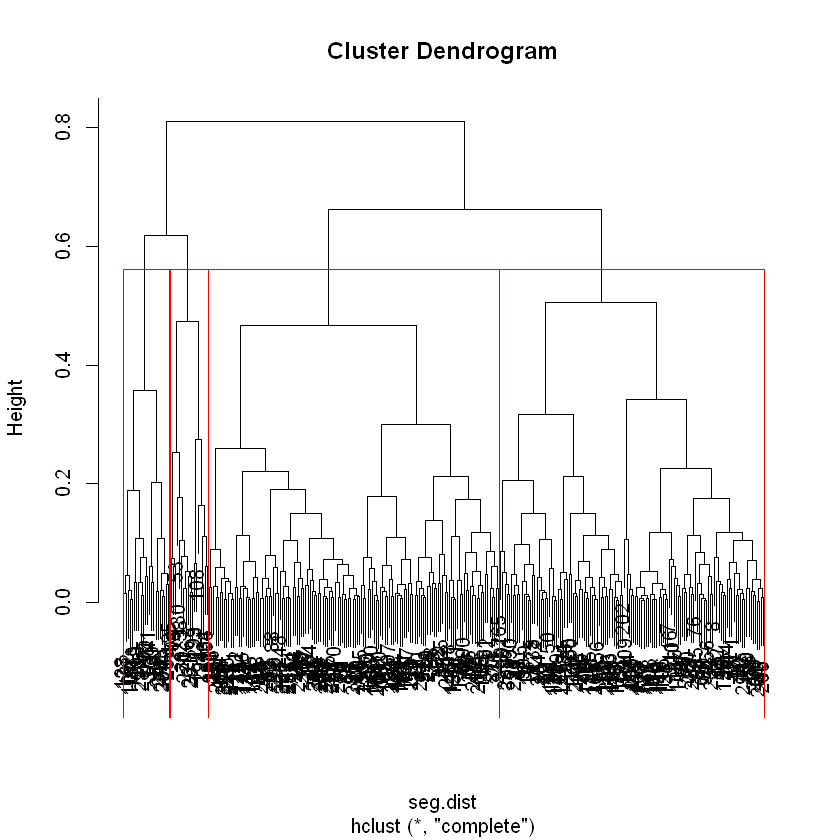

In [24]:
plot(seg.hc)
rect.hclust(seg.hc, k=4, border="red")

> Fig. 11.3. The result of cutting Fig. 11.1 into K = 4 groups.

We obtain the assignment vector for observations using cutree():

In [25]:
seg.hc.segment = cutree(seg.hc, k=4)     # membership vector for 4 groups
table(seg.hc.segment)

seg.hc.segment
  1   2   3   4 
124 136  18  22 

>We see that groups 1 and 2 dominate the assignment. Note that the class labels
(1, 2, 3, 4) are in arbitrary order and are not meaningful in themselves.
seg.hc.segment is the vector of group assignments.

We use our custom summary function seg.summ(), defined above, to inspect the
variables in seg.df with reference to the four clusters:

In [26]:
seg.summ(seg.df, seg.hc.segment)

Group.1,age,gender,income,kids,ownHome,subscribe
1,40.78456,2.000000,49454.08,1.314516,1.467742,1
2,42.03492,1.000000,53759.62,1.235294,1.477941,1
3,44.31194,1.388889,52628.42,1.388889,2.000000,2
4,35.82935,1.545455,40456.14,1.136364,1.000000,2


> We see that groups 1 and 2 are distinct from 3 and 4 due to subscription status.
- Among those who do not subscribe, group 1 is all male (gender=2 as in
levels(seg.df$gender)) while group 1 is all female. 
- Subscribers are differentiated
into those who own a home (group 3) or not (group 4).

We confirm this with a quick plot of gender by subscribe with all of the observations
colored by segment membership. To do this, we use a trick: 
- we convert the
factor variables to numeric, and call the jitter() function to add a bit of noise
and prevent all the cases from being plotted at the same positions (namely at exactly
four points: (1,1), (1,2), (2,1), and (2,2)). 
- We color the points by segment with
col=seg.hc.segment, and label the axes with more meaningful labels:

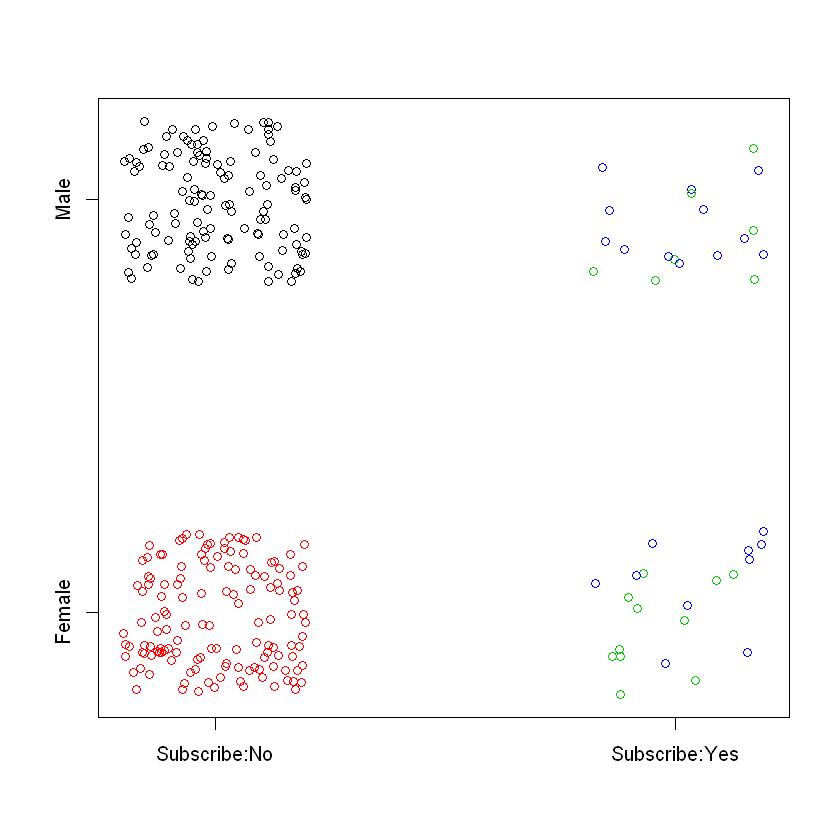

In [27]:
plot(jitter(as.numeric(seg.df$gender))~ jitter(as.numeric(seg.df$subscribe)), 
     col = seg.hc.segment, yaxt='n', xaxt='n', ylab='', xlab='')
axis(1, at=c(1,2), labels=c('Subscribe:No', 'Subscribe:Yes'))
axis(2, at=c(1,2), labels=levels(seg.df$gender))

> Fig. 11.4. Plotting the 4-segment solution from hclust() by gender and subscription status,
with color representing segment membership. We see the uninteresting result that nonsubscribers
are simply divided into two segments purely on the basis of gender.

Why did hclust() find a result that is so uninteresting? That may be answered
in several ways. 
 - For one thing, machine learning techniques often take the path of
least resistance and serve up obvious results. In this specific case, the scaling in
daisy() rescales variables to [0,1] and this will make two-category factors (gender,
subscription status, home ownership) more influential. 
 - Overall, this demonstrates
why you should expect to try several methods and iterate in order to find
something useful.

### 11.3.4 Mean-Based Clustering: kmeans()

K-means clustering attempts to find groups that are most compact, in terms of the
mean sum-of-squares deviation of each observation from the multivariate center
(centroid) of its assigned group. Like hierarchical clustering, k-means is a very popular
approach.
- Because it explicitly computes a mean deviation, k-means clustering relies on Euclidean
distance. Thus it is only appropriate for numeric data or data that can be
reasonably coerced to numeric.
- In our seg.df data, we have a mix of numeric
and binary factors. Unlike higher-order categorical variables, binary factors can be
coerced to numeric with no alteration of meaning.

Although it is not optimal to cluster binary values with k-means, given that we have
a mixture of binary and numeric data, we might attempt it. 
 - Our first step is to create
a variant of seg.df that is recoded to numeric. We make a copy of seg.df and
use ifelse() to recode the binary factors:

In [28]:
seg.df.num = seg.df
seg.df.num$gender    = ifelse(seg.df$gender    == 'Male',  0, 1)
seg.df.num$ownHome   = ifelse(seg.df$ownHome   == 'ownNo', 0, 1)
seg.df.num$subscribe = ifelse(seg.df$subscribe == 'subNo', 0, 1)
summary(seg.df.num)

# There are several ways to recode data, but ifelse() is simple and explicit 

      age            gender           income            kids     
 Min.   :19.26   Min.   :0.0000   Min.   : -5183   Min.   :0.00  
 1st Qu.:33.01   1st Qu.:0.0000   1st Qu.: 39656   1st Qu.:0.00  
 Median :39.49   Median :1.0000   Median : 52014   Median :1.00  
 Mean   :41.20   Mean   :0.5233   Mean   : 50937   Mean   :1.27  
 3rd Qu.:47.90   3rd Qu.:1.0000   3rd Qu.: 61403   3rd Qu.:2.00  
 Max.   :80.49   Max.   :1.0000   Max.   :114278   Max.   :7.00  
    ownHome       subscribe     
 Min.   :0.00   Min.   :0.0000  
 1st Qu.:0.00   1st Qu.:0.0000  
 Median :0.00   Median :0.0000  
 Mean   :0.47   Mean   :0.1333  
 3rd Qu.:1.00   3rd Qu.:0.0000  
 Max.   :1.00   Max.   :1.0000  

We now run the kmeans() algorithm, which specifically requires specifying the
number of clusters to find. We ask for four clusters with centers=4:

In [29]:
set.seed(96743)
seg.k= kmeans(seg.df.num, centers=4)
seg.summ(seg.df, seg.k$cluster)

Group.1,age,gender,income,kids,ownHome,subscribe
1,56.37245,1.428571,92287.07,0.4285714,1.857143,1.142857
2,29.58704,1.571429,21631.79,1.0634921,1.301587,1.158730
3,44.42051,1.452632,64703.76,1.2947368,1.421053,1.073684
4,42.08381,1.454545,48208.86,1.5041322,1.528926,1.165289


In [30]:
aggregate(.~seg.k$cluster, data=seg.df, mean)    # or aggregate()

seg.k$cluster,age,gender,income,kids,ownHome,subscribe
1,56.37245,1.428571,92287.07,0.4285714,1.857143,1.142857
2,29.58704,1.571429,21631.79,1.0634921,1.301587,1.158730
3,44.42051,1.452632,64703.76,1.2947368,1.421053,1.073684
4,42.08381,1.454545,48208.86,1.5041322,1.528926,1.165289


> Unlike with hclust() we now see some interesting differences; the groups appear
to vary by age, gender, kids, income, and home ownership. 

For example, we can
visually check the distribution of income according to segment (which kmeans()
stored in seg.k$cluster) using boxplot():

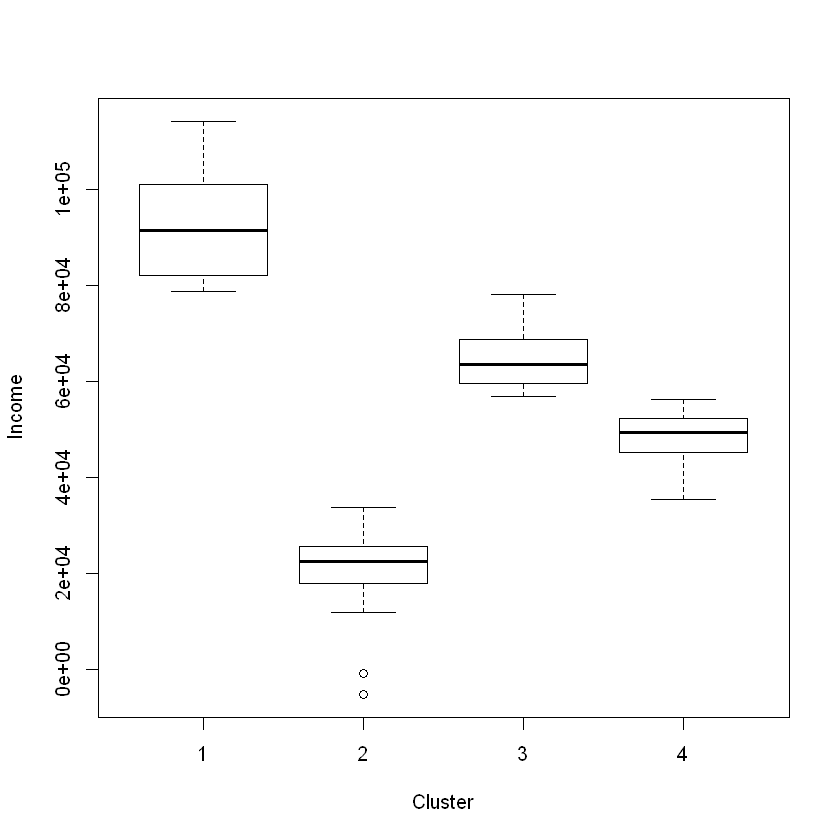

In [31]:
boxplot(seg.df.num$income ~ seg.k$cluster, ylab='Income', xlab='Cluster')

> The result is Fig. 11.5, which shows substantial differences in income by segment.
Note that in clustering models, the group labels are in arbitrary order, so don’t worry
if your solution shows the same pattern with different labels.

We visualize the clusters by plotting them against a dimensional plot.
clusplot() will perform dimensional reduction with principal components or
multidimensional scaling as the data warrant, and then plot the observations with
cluster membership identified (see Chap. 8 to review principal component analysis
and plotting.) 
 - We use clusplot from the cluster package with arguments to
color the groups, shade the ellipses for group membership, label only the groups
(not the individual points) with labels=4, and omit distance lines between groups
(lines=0):

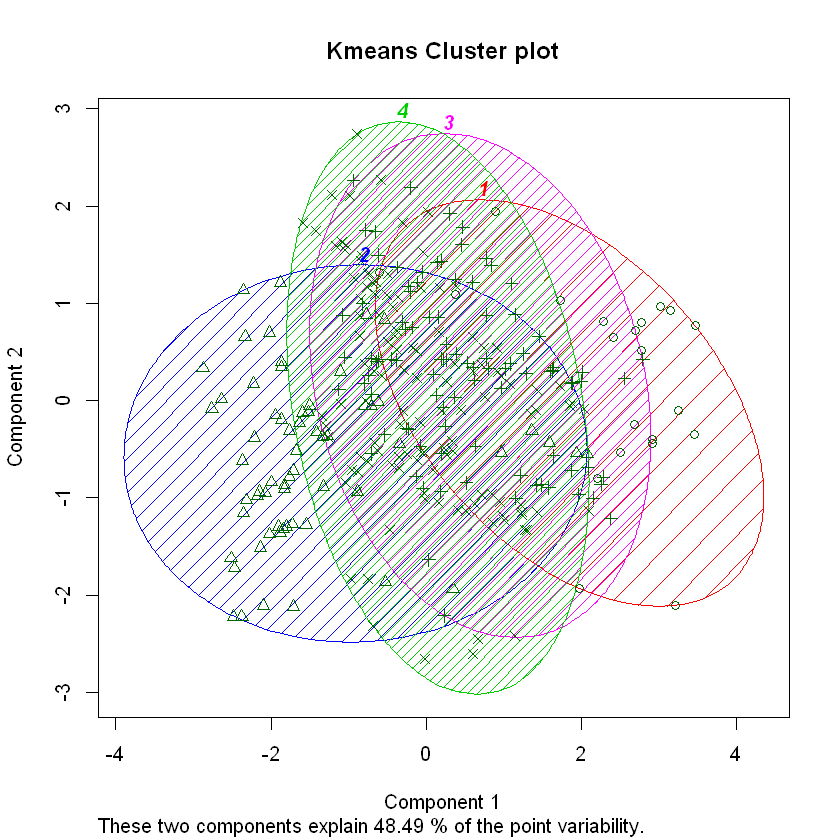

In [32]:
library(cluster)
clusplot(seg.df, seg.k$cluster, color=T, shade=T, labels=4, lines=0, 
         main='Kmeans Cluster plot')

> The code produces the plot in Fig. 11.6, which plots cluster assignment by color and
ellipses against the first two principal components of the predictors (see Sect. 8.2.2).
 - Groups 3 and 4 are largely overlapping (in this dimensional reduction) while group
1 and especially group 2 are modestly differentiated.

1. Overall, this is a far more interesting cluster solution for our segmentation data than
the hclust() proposal. The groups here are clearly differentiated on key variables
such as age and income.With this information, an analyst might cross-reference the
group membership with key variables

2. This may suggest a business strategy. 
 - In the present case, for instance, we see
that group 1 is modestly well differentiated, and has the highest average income. That may make it a good target for a potential campaign. Many other strategies are possible, too; the key point is that the analysis provides interesting options to
consider.

3. A limitation of k-means analysis is that it requires specifying the number of clusters,
and it can be difficult to determine whether one solution is better than another. 
 - If we
were to use k-means for the present problem, we would repeat the analysis for k =3,
4, 5, and so forth, and determine which solution gives the most useful result for our
business goals.

### 11.3.5 Model-Based Clustering: Mclust()

The key idea for model-based clustering is that observations come from groups
with different statistical distributions (such as different means and variances). The
algorithms try to find the best set of such underlying distributions to explain the
observed data. 
- We use the mclust package [53, 54] to demonstrate this.

Such models are also known as “mixture models” because it is assumed that the
data reflect a mixture of observations drawn from different populations, although we
don’t know which population each observation was drawn from. We are trying to
estimate the underlying population parameters and the mixture proportion. 
- mclust
models such clusters as being drawn from a mixture of ***normal (also known as Gaussian***)
distributions.

As you might guess, because mclust models data with normal distributions, it uses
only numeric data. 
 - We use the numeric data frame seg.df.num that we adapted
for kmeans() in Sect. 11.3.4; see that section for the code if needed. The model is
estimated with Mclust() (note the capital letter for the fitting function, as opposed
to the package name):

In [33]:
library(mclust)
seg.mc = Mclust(seg.df.num)
summary(seg.mc)

Warning message:
"package 'mclust' was built under R version 3.4.4"Package 'mclust' version 5.4
Type 'citation("mclust")' for citing this R package in publications.


----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VEV (ellipsoidal, equal shape) model with 3 components:

 log.likelihood   n df       BIC       ICL
      -5137.106 300 73 -10690.59 -10690.59

Clustering table:
  1   2   3 
163  71  66 

> This tells us that the data are estimated to have three clusters (components) with
the sizes as shown in the table.
 - Mclust() compared a variety of different mixture
shapes and concluded that an ellipsoidal model (modeling the data as multivariate
ellipses) fit best.
 - We also see log-likelihood information, which we can use to compare models

We try a 4-cluster solution by telling Mclust() the number of clusters we want with
the G=4 argument:

In [34]:
seg.mc4 = Mclust(seg.df.num, G=4)
summary(seg.mc4)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VII (spherical, varying volume) model with 4 components:

 log.likelihood   n df       BIC       ICL
      -16862.69 300 31 -33902.19 -33906.18

Clustering table:
  1   2   3   4 
104  66  59  71 

>Forcing it to find four clusters resulted in quite a different model, with lower loglikelihood, different multivariate pattern (diagonal), and no obvious correspondence
in the cluster table (for instance, it’s not simply that one of the groups in the
3-cluster solution was split into two).

### 11.3.6 Comparing Models with BIC()

We compare the 3-cluster and 4-cluster models using the Bayesian information criterion
(BIC) [129] with BIC(model1, model2):

In [35]:
BIC(seg.mc, seg.mc4)

,df,BIC
seg.mc,73,10690.59
seg.mc4,31,33902.11


>The difference between the models is 181. The key point to interpreting BIC is to
remember this: the lower the value of BIC, on an infinite number line, the better. ***BIC
of −1,000 is better than BIC of −990***; and BIC of 60 is better than BIC of 90.
- There is one important note when interpreting BIC in R: unfortunately, some functions
return the negative of BIC, which would then have to be interpreted in the opposite
direction.We see above that BIC() reports positive values while Mclust()
returns the same values in the negative direction. If you are ever unsure of the direction
to interpret, use the BIC() function and interpret as noted (lower values are
better). Alternatively, you could also check the log-likelihood values, where higher
log-likelihood values are better (e.g., −1,000 is better than −1,100).

>With that in mind, differences in BIC may be interpreted as shown in Table 11.1.
Comparing the present models, we see that the Mclust() solution with three clusters
(BIC = 10,917) is a much stronger fit than the model with 4 clusters (BIC =
11,098) because it is lower by 181. That doesn’t mean that the 3-cluster model is
correct; there’s no absolute standard for such a statement.
- Rather, it means that between
just these two models, as found by Mclust(), the 3-cluster solution has
much stronger evidence in the data.

> Table 11.1. Interpretation of the Bayesian information criterion (BIC) when comparing two
models

> BIC difference | Odds of model superiority (%) | Strength of the evidence
-------------- | ----------------------------- | -------------------------
0 ~ 2 | 50 ~ 75 | Weak
2 ~ 6 | 75 ~ 95 | Positive
6 ~ 10 | 95 ~ 99 | Strong
$>$ 10 | > 99 | Very Strong
- Lower BIC is better, and the difference in BIC indicates the strength of evidence. Adapted
from Raftery [129, p. 139]



Will the 3-cluster solution provide useful insight for the business? We check the
quick summary and plot the clusters:

In [36]:
seg.summ(seg.df, seg.mc$class)

Group.1,age,gender,income,kids,ownHome,subscribe
1,44.68018,1.472393,52980.52,1.171779,1.865031,1.245399
2,38.02229,1.000000,51550.98,1.422535,1.000000,1.000000
3,36.02187,2.000000,45227.51,1.348485,1.000000,1.000000


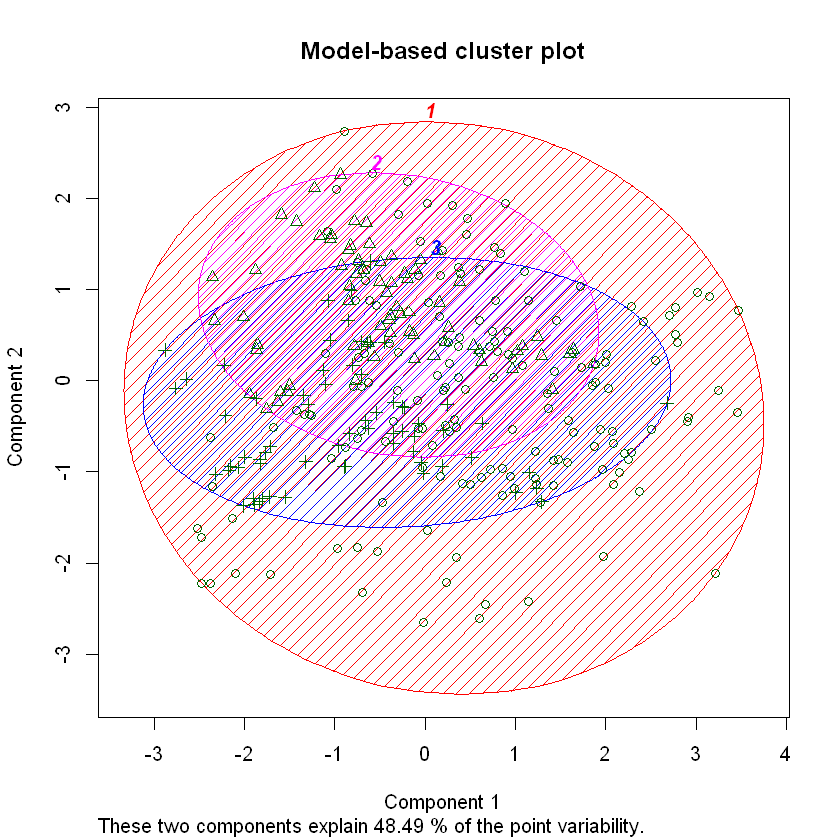

In [38]:
clusplot(seg.df, seg.mc$class, color=T, shade=T, labels=4, lines=0, 
         main='Model-based cluster plot')

Fig. 11.7. A cluster plot using clusplot() for the 3-cluster
model from Mclust().

When we compare the Mclust() solution to the one found by kmeans(), there
are arguments for and against each. 
 - The 4-cluster k-means solution had much
crisper differentiation on demographics (Sect. 11.3.4). On the other hand, the most
clearly differentiated segment (segment 2; cf. Fig. 11.6) had the lowest income and
thus might be more difficult to sell to (or not—it depends on the product or service).

Looking closely at the Mclust() solution, we see that one of the groups is nicely
differentiated (group 3), 
 - but the demographic differences reported in seg.summ()
are not particularly interesting. Everyone in Group 2 is a non-subscriber, Group 3
has no kids, and Group 1 mixes everyone else. 
 - As always, the ultimate value depends
more on one’e strategy, business case, and modes available to target respondents
than it does on the statistical solution in itself. The statistics provide information
about how customers are similar and different, not a definitive answer.

### 11.3.7 Latent Class Analysis: poLCA()

Latent class analysis (LCA) is similar to mixture modeling in the assumption that
differences are attributable to unobserved groups that one wishes to uncover. 
 - In
this section we take a look at the poLCA package for polytomous (i.e., categorical)
LCA [105].

Whereas mclust and kmeans() work with numeric data, and hclust() depends
on the distance measure, poLCA uses only categorical variables. 
 - To demonstrate
it here, we adopt an opposite strategy from our procedure with k-means
and mclust and convert our data seg.df to be all categorical data before
analyzing it.

There are several approaches to convert numeric data to factors, but for purposes
here we simply recode everything as binary with regard to a specified cutting point
(for instance, to recode as 1 for income below some cutoff and 2 above that). 
 - In the
present case, we split each variable at the median() and recode using ifelse()
and factor() (we’ll see a more general approach to recoding numeric values with
cut() in Sect. 12.4.1):

In [41]:
seg.df.cut         = seg.df
seg.df.cut$age     = factor(ifelse(seg.df$age < median(seg.df$age), 1, 2))
seg.df.cut$income  = factor(ifelse(seg.df$income < median(seg.df$income), 1, 2))
seg.df.cut$kids    = factor(ifelse(seg.df$kids < median(seg.df$kids), 1, 2))
summary(seg.df.cut)

 age        gender    income  kids      ownHome     subscribe  
 1:150   Female:157   1:150   1:121   ownNo :159   subNo :260  
 2:150   Male  :143   2:150   2:179   ownYes:141   subYes: 40  

With the data in place, we specify the model that we want to fit. poLCA can estimate
complex models with covariates, but for the present analysis we only wish to examine the effect of cluster membership alone. 

Thus, we model the dependent
variables (all the observed columns) with respect to the model intercepts (i.e., the
cluster positions).We use with() to save typing, and ∼1 to specify a formula with
intercepts only:

In [46]:
seg.f  = with(seg.df.cut,
              cbind(age, gender, income, kids, ownHome, subscribe)~1)
summary(seg.f)

 Length   Class    Mode 
      3 formula    call 

Next we fit poLCA models for K = 3 and K = 4 clusters using poLCA(formula,
data, nclass=K):

In [47]:
library(poLCA)
set.seed(02807)
seg.LCA3 = poLCA(seg.f, data=seg.df.cut, nclass=3)

Warning message:
"package 'poLCA' was built under R version 3.4.4"Loading required package: scatterplot3d
Warning message:
"package 'scatterplot3d' was built under R version 3.4.4"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.4.4"

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$age
               1      2
class 1:  1.0000 0.0000
class 2:  0.0000 1.0000
class 3:  0.6555 0.3445

$gender
          Female   Male
class 1:  0.4211 0.5789
class 2:  0.4681 0.5319
class 3:  0.6079 0.3921

$income
               1      2
class 1:  1.0000 0.0000
class 2:  0.3803 0.6197
class 3:  0.3746 0.6254

$kids
               1      2
class 1:  0.2818 0.7182
class 2:  0.8065 0.1935
class 3:  0.1575 0.8425

$ownHome
           ownNo ownYes
class 1:  0.7289 0.2711
class 2:  0.2338 0.7662
class 3:  0.6638 0.3362

$subscribe
           subNo subYes
class 1:  0.7496 0.2504
class 2:  0.8948 0.1052
class 3:  0.8960 0.1040

Estimated class population shares 
 0.1974 0.341 0.4616 
 
Predicted class memberships (by modal posterior prob.) 
 0.2333 0.3467 0.42 
 
Fit for 3 latent classes: 
number of observations: 300 
number of estimated parameters: 20 
residual degrees of freedom: 43 
maximum log-

In [48]:
seg.LCA4 <- poLCA(seg.f, data=seg.df.cut, nclass=4)

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$age
               1      2
class 1:  0.6823 0.3177
class 2:  0.0000 1.0000
class 3:  1.0000 0.0000
class 4:  1.0000 0.0000

$gender
          Female   Male
class 1:  0.5853 0.4147
class 2:  0.4810 0.5190
class 3:  0.8466 0.1534
class 4:  0.3277 0.6723

$income
               1      2
class 1:  0.4137 0.5863
class 2:  0.3701 0.6299
class 3:  0.5850 0.4150
class 4:  1.0000 0.0000

$kids
               1      2
class 1:  0.0000 1.0000
class 2:  0.8114 0.1886
class 3:  1.0000 0.0000
class 4:  0.2506 0.7494

$ownHome
           ownNo ownYes
class 1:  0.6540 0.3460
class 2:  0.2688 0.7312
class 3:  0.6537 0.3463
class 4:  0.7721 0.2279

$subscribe
           subNo subYes
class 1:  0.8746 0.1254
class 2:  0.8965 0.1035
class 3:  1.0000 0.0000
class 4:  0.7203 0.2797

Estimated class population shares 
 0.4101 0.3697 0.0643 0.1559 
 
Predicted class memberships (by modal posterior prob.) 
 0.41 0.

> poLCA() displays voluminous information by default, which we have omitted.

In [49]:
seg.LCA3$bic
seg.LCA4$bic

[1] 2298.767

[1] 2330.043

> The 3-cluster model shows a lower BIC by 32 and thus a substantially stronger fit
to the data (see Table 11.1).

As we’ve seen, that is not entirely conclusive as to business
utility, so we also examine some other indicators such as the quick summary
function and cluster plots:

In [50]:
seg.summ(seg.df, seg.LCA3$predclass)

Group.1,age,gender,income,kids,ownHome,subscribe
1,28.22385,1.685714,30075.32,1.1285714,1.285714,1.271429
2,54.44407,1.576923,60082.47,0.3846154,1.769231,1.105769
3,37.47652,1.277778,54977.08,2.0793651,1.325397,1.079365


In [51]:
table(seg.LCA3$predclass)


  1   2   3 
 70 104 126 

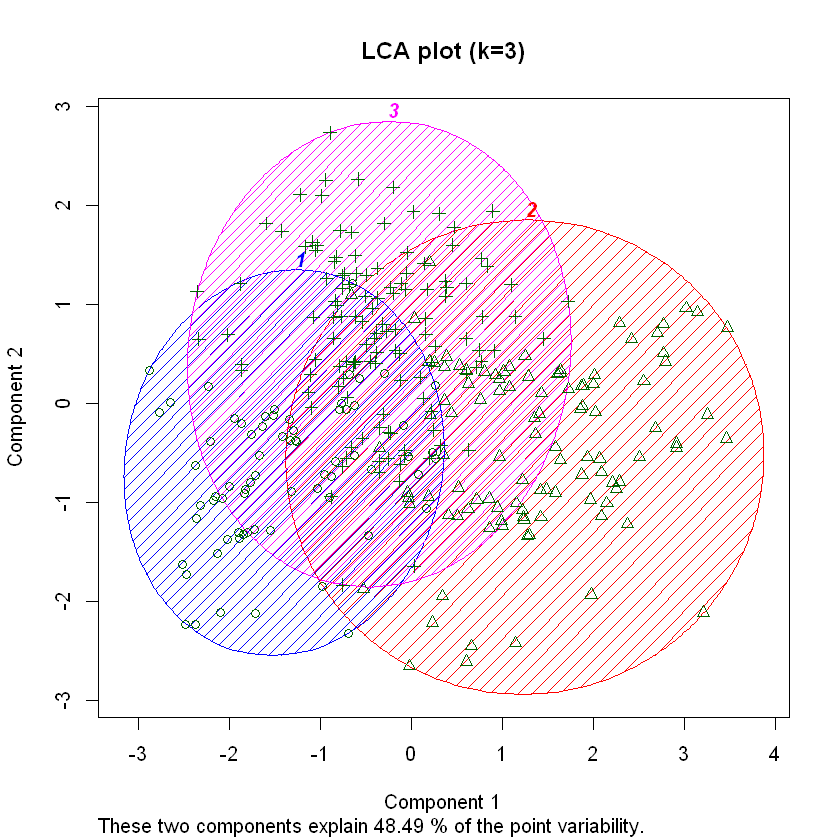

In [54]:
clusplot(seg.df, seg.LCA3$predclass, color=T, shade=T, labels=4, lines=0,
         main='LCA plot (k=3)')

In [58]:
seg.summ(seg.df, seg.LCA4$predclass)

Group.1,age,gender,income,kids,ownHome,subscribe
1,36.62554,1.349593,52080.13,2.1951220,1.349593,1.113821
2,53.64073,1.535714,60534.17,0.5178571,1.785714,1.098214
3,30.22575,1.050000,41361.81,0.0000000,1.350000,1.000000
4,27.61506,1.866667,28178.70,1.1777778,1.066667,1.333333


In [55]:
table(seg.LCA4$predclass)


  1   2   3   4 
123 112  20  45 

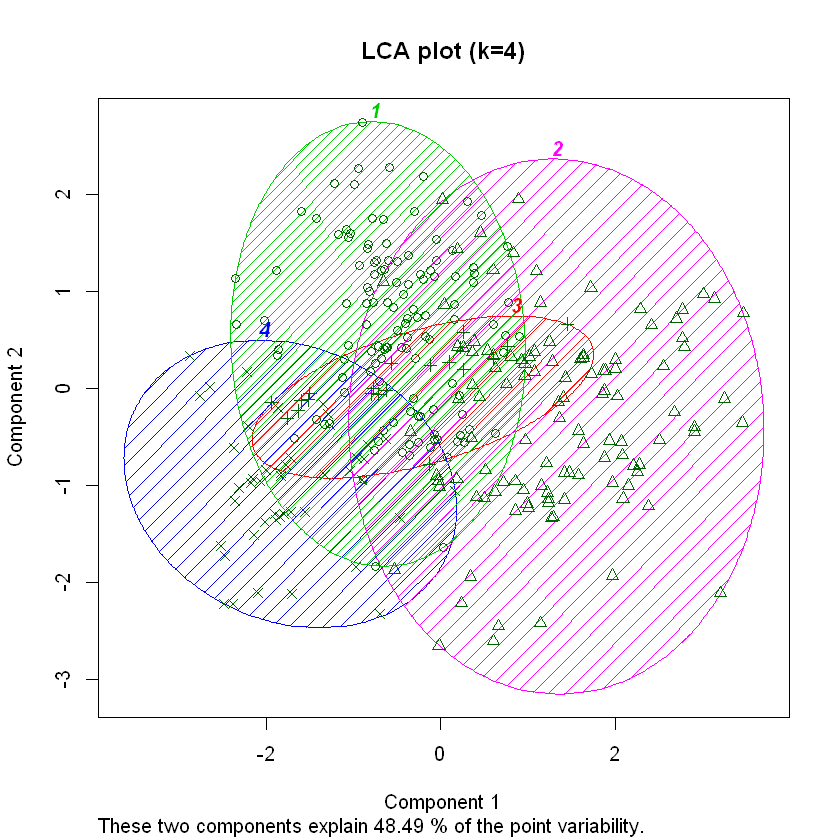

In [56]:
clusplot(seg.df, seg.LCA4$predclass, color=T, shade=T, labels=4, lines=0,
         main='LCA plot (k=4)')

> We interpret the LCA results by looking first at the cluster plots (Fig. 11.8). 
 - At a high
level, it appears that “Group 2” is similar in both solutions. 
 - The primary difference is
that “Group 3” buried inside the overlapping ellipses in the 4-cluster solution could
be viewed as being largely carved out of two larger groups (Groups “2” and “3” as
labeled in the 3-cluster solution). This is an approximate interpretation of the data
visualization, not a perfect correspondence.

> Does the additional group in the 4-cluster solution add anything to our interpretation?
Turning to the quick summary from seg.summ() in the code block, we
see good differentiation of groups in both models. 
 - One argument in favor of the
4-cluster solution is that Group 3 has no subscribers (as shown by the mean in the
seg.summ() results) and is relatively well identified (mostly younger women with
no kids); that might make it an appealing group either for targeting or exclusion, depending
on one’s strategy.

As a final note on model-based clustering (and many other clustering methods such
as kmeans()), the solutions are partially dependent on the random number seed. It
can be useful to run the models with different random seeds and compare the results.
This brings us to our next topic: comparing cluster solutions.

### 11.3.8 Comparing Cluster Solutions

One question we’ve avoided until now is this: given that we know the real group
membership in seg.df, how does it compare to the clustering methods’ results?
The question is not as simple as counting agreement for two reasons. 
 - First, it is not
obvious how to match one cluster solution to another because the order of group
labels is arbitrary. “Group 1” in one solution might well be called “Group 2” or
“Group C” in another solution.
 - Second, if we solve the matching problem we still need to adjust for chance agreement.
Is an agreement rate of 90% good? It depends on the base rate. If you are
attempting to predict the gender of each person in a random sample of Japanese
citizens, then 90% accuracy is much better than chance (which would be roughly
51 %, the proportion of women). On the other hand, if you are attempting to predict
whether each respondent speaks Japanese, then 90% accuracy is terrible (just assigning
everyone to “Yes” would achieve nearly perfect prediction, because the true
rate is over 99%).

The mclust package provides tools to solve both issues. 
- mapClass() solves
the matching problem. It examines all permutations of how two sets of class assignments
might be related and selects a mapping that maximizes agreement between
the two assignment schemes. 
- adjustedRandIndex() likewise matches
two assignment schemes and then computes the degree of agreement over and above
what might be attributed to “chance” by simply assigning all observations to the
largest group [81, 131]. Its magnitude may be interpreted similarly to a standard r
correlation coefficient.

We use table() to look at the cross-tabs between the LCA 3-cluster and 4-cluster
solutions found above:

In [60]:
table(seg.LCA3$predclass, seg.LCA4$predclass)

   
      1   2   3   4
  1  13   0  12  45
  2   0 104   0   0
  3 110   8   8   0

>It would appear that observations assigned to “Group 1” in the 3-cluster
solution are split between Groups 1, 3, and 4 in the 4-cluster solution, while
“Group 3” maps closely to “Group 1” (in the 4 class solution) and “Group
2” is predominantly the same in both.

However, matching groups manually
is sometimes unclear and generally error-prone. Instead, we use mapClass
(a, b) and adjustedRandIndex(a, b) to compare agreement between the
two solutions:

In [64]:
library(mclust)

# [similarly for mapping b to a, omitted]
mapClass(seg.LCA3$predclass, seg.LCA4$predclass)

adjustedRandIndex(seg.LCA3$predclass, seg.LCA4$predclass)

$aTOb
$aTOb$`1`
[1] 4

$aTOb$`2`
[1] 2

$aTOb$`3`
[1] 1


$bTOa
$bTOa$`1`
[1] 3

$bTOa$`2`
[1] 2

$bTOa$`3`
[1] 1

$bTOa$`4`
[1] 1

[1] 0.7288822

> This tells us that “1” in the LCA3 model (a) maps best to “4” in the LCA4 model
(b), and so forth. The adjusted Rand index of 0.729 indicates that the match between
the two assignment lists is much better than chance. From a business perspective, it
also tells us that the 3-cluster and 4-cluster differ modestly from one another, which
provides another perspective on choosing between them.

By comparison, R makes it easy to see what happens if we were to test a random
assignment scheme:

In [65]:
set.seed(11021)

random.data = sample(4, length(seg.LCA4$predclass), replace=T)

adjustedRandIndex(random.data, seg.LCA4$predclass)

[1] 0.002292031

> In this case, the adjusted Rand index is near zero, because the match between the
clusters is no better than random chance.

Finally we compare the LCA 4-cluster solution to the true segments in
seg.raw:

In [67]:
table(seg.raw$Segment, seg.LCA4$predclass)

            
              1  2  3  4
  Moving up  50  4  8  8
  Suburb mix 62 29  2  7
  Travelers   0 79  1  0
  Urban hip  11  0  9 30

In [68]:
adjustedRandIndex(seg.raw$Segment, seg.LCA4$predclass)

[1] 0.3513031

> With a Rand index of 0.35, the LCA solution matches the true segment assignments
moderately better than chance alone. In many cases, of course, one would not have
identified clusters for comparison; but when they are available from other projects
or previous efforts, it is helpful to examine correspondence in this way.

## 11.4 Classification

Whereas clustering is the process of discovering group membership, classification
is the prediction of membership. In this section we look at two examples of classification:
 - predicting segment membership, and predicting who is likely to subscribe
to a service.

Classification uses observations whose status is known to derive predictors, and then
applies those predictors to new observations. When working with a single data set it
is typically split into a training set that is used to develop the classification model,
and a test set that is used to determine performance. It is crucial not to assess performance
on the same observations that were used to develop the model.

A classification project typically includes the following steps at a minimum:
- A data set is collected in which group membership for each observation is
known or assigned (e.g., assigned by behavioral observation, expert rating, or
clustering procedures).
- The data set is split into a training set and a test set. A common pattern is
to select 50–80% of the observations for the training set (67% seems to be
particularly common), and to assign the remaining observations to the test set.
- A prediction model is built, with a goal to predict membership in the training
data as well as possible.
- The resulting model is then assessed for performance using the test data. Performance
is assessed to see that it exceeds chance (base rate). Additionally one
might assess whether the method performs better than a reasonable alternative
(and simpler or better-known) model.

## 11.4.1 Naive Bayes Classification: naiveBayes()

A simple yet powerful classification method is the Naive Bayes (NB) classifier.
Naive Bayes uses training data to learn the probability of class membership as a
function of ***each predictor variable considered independently (hence “naive”)***. When
applied to new data, class membership is assigned to the category considered to be
most likely according to the joint probabilities assigned by the combination of predictors.
- Several R packages provide NB methods; we use the e1071 package from
the Vienna University of Technology (TU Wien) [114].

The first step in training a classifier is to split the data into training and test data,
which will allow one to check whether the model works on the test data (or is instead
overfitted to the training data).
- We select 65% of the data to use for training
with the sample() function, and keep the unselected cases as holdout (test) data.
Note that we select the training and test cases not from seg.df, which omitted
the previously known segment assignments, but from the full seg.raw data frame.
Classification requires known segment assignments in order to learn how to assign
new values.

In [71]:
set.seed(04625)
train.prop   = 0.65
train.cases  = sample(nrow(seg.raw), nrow(seg.raw) * train.prop)
seg.df.train = seg.raw[train.cases, ]
seg.df.test  = seg.raw[-train.cases, ]

We then train a naive Bayes classifier to predict Segment membership from all
other variables in the training data. This is a very simple command:

In [72]:
library(e1071)
(seg.nb = naiveBayes(Segment ~ ., data=seg.df.train))

Warning message:
"package 'e1071' was built under R version 3.4.4"


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
 Moving up Suburb mix  Travelers  Urban hip 
 0.2512821  0.3025641  0.2615385  0.1846154 

Conditional probabilities:
            age
Y                [,1]     [,2]
  Moving up  36.09168 4.167010
  Suburb mix 40.14240 5.173803
  Travelers  57.47194 8.126370
  Urban hip  23.95040 1.798332

            gender
Y               Female      Male
  Moving up  0.6530612 0.3469388
  Suburb mix 0.4576271 0.5423729
  Travelers  0.4705882 0.5294118
  Urban hip  0.3333333 0.6666667

            income
Y                [,1]      [,2]
  Moving up  52880.45  9836.682
  Suburb mix 54124.75 11429.940
  Travelers  63547.20 23862.123
  Urban hip  21285.99  5141.259

            kids
Y                [,1]     [,2]
  Moving up  2.102041 1.489476
  Suburb mix 1.694915 1.249196
  Travelers  0.000000 0.000000
  Urban hip  1.166667 1.108409

            ownHome
Y                o

> Examining the summary of the model object seg.nb, we see how the NB model
works.
- First, the a priori likelihood of segment membership—i.e., the estimated
odds of membership before any other information is added—is 25.1% for the Moving
up segment, 30.2% for the Suburb mix segment, and so forth. 
- Next we see the
probabilities conditional on each predictor. In the code above, we show the probabilities
for gender conditional on segment. A member of the Moving up segment
has a 65.3% probability of being female in the training data.

>The NB classifier starts with the observed probabilities of gender, age, etc., conditional
on segment found in the training data. It then uses Bayes’ Rule to compute
the probability of segment, conditional on gender, age, etc. This can then be
used to estimate segment membership in new observations such as the test data.
You have likely seen a description of how Bayes’ Rule works, and we will not
repeat it here. For details, refer to a general text on Bayesian methods such as
Kruschke [94].

Using the classifier model object seg.nb we can predict segment membership in
the test data seg.df.test with predict():

In [73]:
(seg.nb.class = predict(seg.nb, seg.df.test))

[1] Suburb mix Travelers  Suburb mix Suburb mix Suburb mix Suburb mix
  [7] Moving up  Suburb mix Suburb mix Suburb mix Travelers  Moving up 
 [13] Moving up  Moving up  Suburb mix Moving up  Moving up  Suburb mix
 [19] Suburb mix Suburb mix Moving up  Suburb mix Suburb mix Moving up 
 [25] Suburb mix Suburb mix Moving up  Suburb mix Suburb mix Suburb mix
 [31] Suburb mix Suburb mix Suburb mix Moving up  Suburb mix Suburb mix
 [37] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Urban hip 
 [43] Urban hip  Urban hip  Urban hip  Urban hip  Urban hip  Urban hip 
 [49] Urban hip  Urban hip  Urban hip  Moving up  Urban hip  Urban hip 
 [55] Urban hip  Travelers  Travelers  Travelers  Travelers  Travelers 
 [61] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
 [67] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
 [73] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
 [79] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
 [85] Suburb mix Moving up  Moving up  Travelers  Moving up  Travelers 
 [91] Suburb mix Moving up  Suburb mix Travelers  Moving up  Travelers 
 [97] Moving up  Moving up  Moving up  Moving up  Moving up  Moving up 
[103] Moving up  Travelers  Moving up 
Levels: Moving up Suburb mix Travelers Urban hip

We examine the frequencies of predicted membership using table() and
prop.table():

In [75]:
prop.table(table(seg.nb.class))

seg.nb.class
 Moving up Suburb mix  Travelers  Urban hip 
 0.2285714  0.3047619  0.3428571  0.1238095 

A cluster plot of these segments against their principal components is created with
the following code and shown in Fig. 11.9. In this case we remove the known segment
assignments from the data using [ , -7] because we are using the NB classifications:

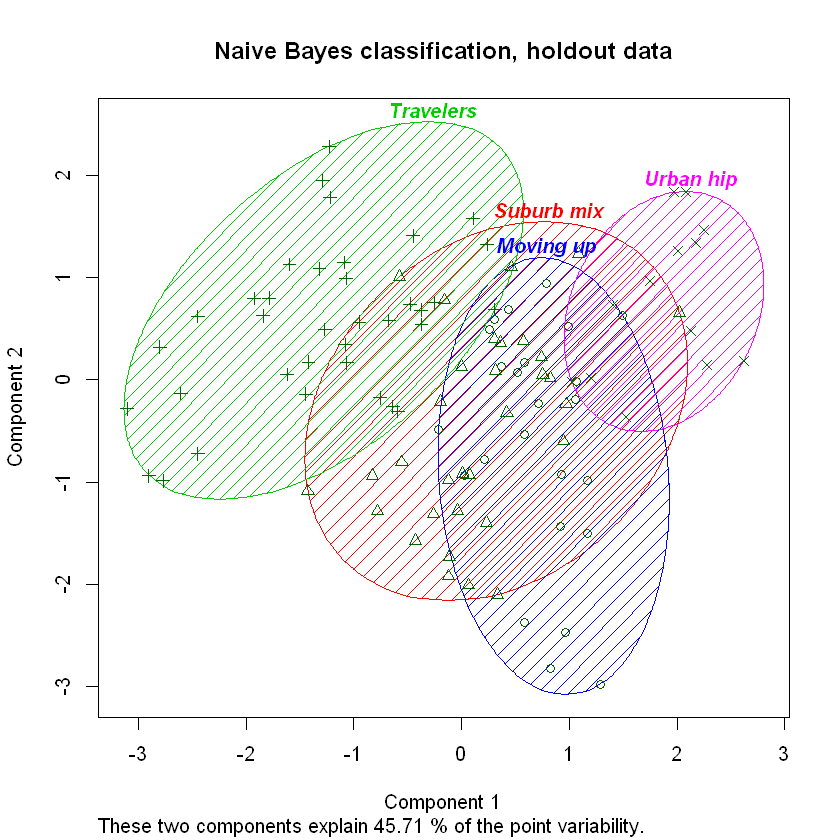

In [76]:
clusplot(seg.df.test[, -7], seg.nb.class, color=T, shade=T, labels=4, lines=0,
         main='Naive Bayes classification, holdout data')

> How well did the model perform? We compare the predicted membership to the
known segments for the 35% holdout (test) data. 

First we see the raw agreement
rate, which is 80% agreement between predicted and actual segment membership:

In [77]:
mean(seg.df.test$Segment==seg.nb.class)

[1] 0.8

As we saw in Sect. 11.3.8, instead of raw agreement, one should assess performance
above chance. In this case, we see that NB was able to recover the segments in the
test data imperfectly but substantially better than chance:

In [78]:
adjustedRandIndex(seg.nb.class, seg.df.test$Segment)

[1] 0.5626787

We compare performance for each category using table(). The resulting table is
known in machine learning as a confusion matrix:

In [79]:
table(seg.nb.class, seg.df.test$Segment)

            
seg.nb.class Moving up Suburb mix Travelers Urban hip
  Moving up         13         10         0         1
  Suburb mix         3         29         0         0
  Travelers          5          2        29         0
  Urban hip          0          0         0        13

> The NB prediction (shown in the rows) was correct for a majority of observations
in each segment, as shown in the diagonal. When we examine individual categories,
we see that NB was correct for every proposed member of the Urban hip segment
(13 correct out of 13 proposed), and for nearly 90% of the Suburb mix proposals(29 correct out of 32). 

>However, it incorrectly classified 12 of the actual 41 Suburb
mix respondents into other segments, and similarly failed to identify 1 of the true
Urban hip segment.
- This demonstrates the asymmetry of positive prediction (making a correct claim of inclusion) vs. negative prediction (making a correct claim of exclusion). There is likely to be a different business gain for identifying true positives and true negatives, versus the costs of false positives and false negatives.
- If you have estimates of these costs, you can use the confusion matrix to compute a custom metric for evaluating your classification results.

As we did for clustering, we check the predicted segments’ summary values using
our summary function. However, because we now have labeled test data, we can
also compare that to the summary values using the true membership:

In [82]:
# summary data for proposed segments in the test data
seg.summ(seg.df.test, seg.nb.class)

Group.1,age,gender,income,kids,ownHome,subscribe,Segment
Moving up,34.29258,1.125000,51369.52,2.2916667,1.416667,1.250000,1.541667
Suburb mix,41.24653,1.562500,58095.10,2.1875000,1.562500,1.000000,1.906250
Travelers,55.08669,1.444444,58634.10,0.0000000,1.666667,1.166667,2.666667
Urban hip,23.36047,1.461538,22039.69,0.8461538,1.307692,1.153846,4.000000


In [83]:
seg.summ(seg.df.test, seg.df.test$Segment)

Group.1,age,gender,income,kids,ownHome,subscribe,Segment
Moving up,36.88989,1.190476,53582.16,1.4761905,1.333333,1.190476,1
Suburb mix,39.61984,1.487805,56341.99,2.2439024,1.585366,1.048780,2
Travelers,58.57245,1.448276,59869.24,0.0000000,1.689655,1.206897,3
Urban hip,23.71537,1.428571,22700.06,0.9285714,1.357143,1.142857,4


Overall, we see that the summary of demographics for the proposed segments (the
first summary above) is very similar to the values in the true segments (the second
summary). Thus, although NB assigned some observations to the wrong segments,
its overall model of the segment descriptive values—at least at the mean values—is
similar for the proposed and true segments. 
- By making such a comparison using the
test data, we gain confidence that although assignment is not perfect on a case-bycase
basis, the overall group definitions are quite similar.

For naive Bayes models, predict() can estimate not only the most likely segment
but also the odds of membership in each segment, using the type="raw"
argument:

In [87]:
predict(seg.nb, seg.df.test, type='raw')

Moving up,Suburb mix,Travelers,Urban hip
0.4070779794,0.592805214,4.848358e-05,6.832328e-05
0.0002715183,0.002422066,9.973064e-01,6.143554e-32
0.2671392917,0.732689657,1.710510e-04,2.844967e-40
0.2237216425,0.774645744,1.632613e-03,7.568258e-37
0.2255662711,0.774027968,4.057610e-04,9.030641e-11
0.2051010831,0.794804695,9.422156e-05,1.554167e-33
0.6226982604,0.377293787,7.952188e-06,1.250892e-24
0.1429047975,0.856520036,5.751660e-04,2.667936e-36
0.2282427082,0.771646162,1.111296e-04,6.476270e-22
0.1881605806,0.811463209,3.762108e-04,2.155829e-33


> This tells us that Respondent 1 is estimated to be about 59%likely to be a member of
Suburb mix, yet 40% likely to be in Moving up. Respondent 2 is estimated nearly
100% likely to be in Travelers. This kind of individual-level detail can suggest
which individuals to target according to the difficulty of targeting and the degree of
certainty. 
- For high-cost campaigns, we might target only those most certain to be in
a segment; whereas for low-cost campaigns, we might target people for second-best
segment membership in addition to primary segment assignment.

### 11.4.2 Random Forest Classification: randomForest()

A random forest (RF) classifier does not attempt to fit a single model to data but
instead builds an ensemble of models that jointly classify the data [19, 104]. RF
does this by fitting a large number of classification trees. 
- In order to find an assortment
of models, each tree is optimized to fit only some of the observations (in our
case, customers) using only some of the predictors. The ensemble of all trees is the
forest.

When a new case is predicted, it is predicted by every tree and ***the final decision is
awarded to the consensus value*** that receives the most votes. 
- In this way, a random
forest avoids dependencies on precise model specification while remaining resilient
in the face of difficult data conditions, such as data that are collinear or wide (more
columns than rows). 
- Random forest models perform well across a wide variety of
data sets and problems [48].

We use the same seg.df.train training data as in Sect. 11.4.1, and
call randomForest() from the (surprise!) randomForest package to fit the
classifier:

In [88]:
library(randomForest)
set.seed(98040)
(seg.rf <- randomForest(Segment ~ ., data=seg.df.train, ntree=3000))

Warning message:
"package 'randomForest' was built under R version 3.4.4"randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = Segment ~ ., data = seg.df.train, ntree = 3000) 
               Type of random forest: classification
                     Number of trees: 3000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 24.1%
Confusion matrix:
           Moving up Suburb mix Travelers Urban hip class.error
Moving up         29         19         0         1  0.40816327
Suburb mix        20         35         3         1  0.40677966
Travelers          0          3        48         0  0.05882353
Urban hip          0          0         0        36  0.00000000

> There are two things to note about the call to randomForest(). 
- First, random
forests are random to some extent, as the name says. They select variables and subsets
of data probabilistically. Thus, we use set.seed() before modeling. 
- Second,
we added an argument ntree=3000 to specify the number of trees to create in the
forest. It is sometimes suggested to have 5–10 trees per observation for small data
sets like the present one.

> randomForest() returns a confusion matrix of its own based on the training
data. How can it do that? 
 - Remember that RF fits many trees, where each tree is
optimized for a portion of the data. It uses the remainder of the data—known as
“out of bag” or OOB data—to assess the tree’s performance more generally. 
 - In the
confusion matrix, we see that the Travelers and Urban hip segments fit well, while
the Moving up and Suburb mix segments had 40% error rates in the OOB data. This
is an indicator that we may see similar patterns in our holdout data.

What does a random forest look like? A tree among those
we fit above (using visualization code from Caldon [21]). The complete forest comprises
3,000 such trees that differ in structure and the predictors used. When an
observation is classified, it is assigned to the group that is predicted by the greatest
number of trees within the ensemble.

In [90]:
# Caldon, P. (2013). to.dendrogram. http://stats.stackexchange.com/a/45161.

to.dendrogram <- function(dfrep,rownum=1,height.increment=0.1){

  if(dfrep[rownum,'status'] == -1){
    rval <- list()

    attr(rval,"members") <- 1
    attr(rval,"height") <- 0.0
    attr(rval,"label") <- dfrep[rownum,'prediction']
    attr(rval,"leaf") <- TRUE

  }else{##note the change "to.dendrogram" and not "to.dendogram"
    left <- to.dendrogram(dfrep,dfrep[rownum,'left daughter'],height.increment)
    right <- to.dendrogram(dfrep,dfrep[rownum,'right daughter'],height.increment)
    rval <- list(left,right)

    attr(rval,"members") <- attr(left,"members") + attr(right,"members")
    attr(rval,"height") <- max(attr(left,"height"),attr(right,"height")) + height.increment
    attr(rval,"leaf") <- FALSE
    attr(rval,"edgetext") <- dfrep[rownum,'split var']
    #To add Split Point in Dendrogram
    #attr(rval,"edgetext") <- paste(dfrep[rownum,'split var'],"\n<",round(dfrep[rownum,'split point'], digits = 2),"=>", sep = " ")
  }

  class(rval) <- "dendrogram"

  return(rval)
}

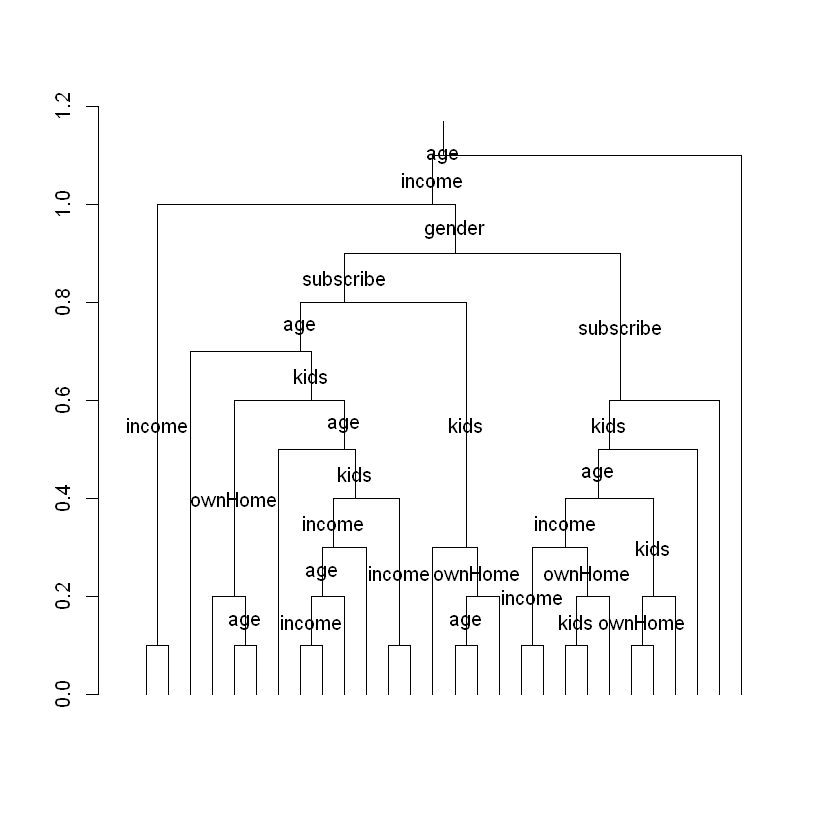

In [93]:
mod  = randomForest(Segment ~ .,data=seg.df.train)
tree = getTree(mod, 1, labelVar=TRUE)

d    = to.dendrogram(tree)
#str(d)
plot(d, center=TRUE, leaflab='none', edgePar=list(t.cex=1,p.col=NA,p.lty=0))

> Fig. 11.10. Two examples among the 3,000 trees in the ensemble found by
randomForest() for segment prediction in seg.df. The trees differ substantially in
structure and variable usage. No single tree is expected to be a particularly good predictor in
itself, yet the ensemble of all trees may predict well in aggregate by voting on the assignment
of observations to outcome groups.

In [97]:
seg.rf.class = predict(seg.rf, seg.df.test)

A cluster plot of predicted segment membership is shown in Fig. 11.11, where we
omit the known segment assignments in column 7 of seg.df.test because we
want to see the differences on the baseline variables on the basis of segments identified
in the RF model:

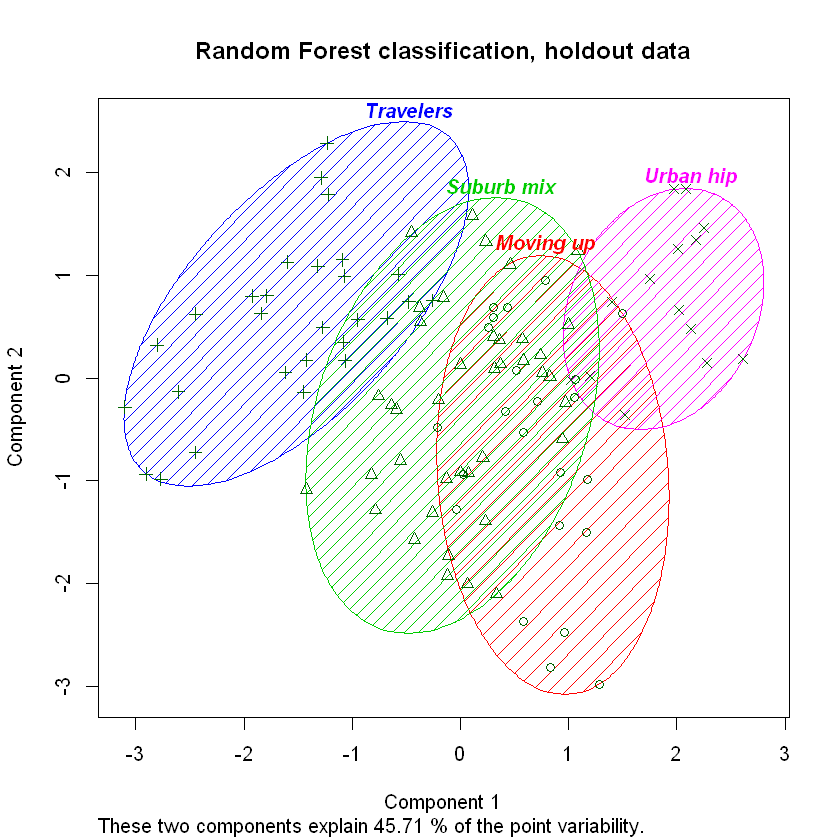

In [98]:
clusplot(seg.df.test[, -7], seg.rf.class, color=TRUE, shade=TRUE, 
         labels=4, lines=0, main="Random Forest classification, holdout data")

> The RF clusters in Fig. 11.11 are quite similar in shape to those found by naive
Bayes in Fig. 11.9, with respect to the principal components axes.

It is possible to inspect the distribution of predictions for individual cases. Add the
predict.all=TRUE argument to the predict() call to get the estimate of
every tree for every case in the test data.We then apply() the table() function
to summarize a few of these:

In [99]:
seg.rf.class.all = predict(seg.rf, seg.df.test, predict.all = T)
apply(seg.rf.class.all$individual[1:5,], 1, table) / 3000

,2,3,4,6,7
Moving up,0.42066667,0.076333333,0.1886667,0.1223333,0.217
Suburb mix,0.47266667,0.485000000,0.6930000,0.8526667,0.340
Travelers,0.02966667,0.436333333,0.1173333,0.0240000,0.050
Urban hip,0.07700000,0.002333333,0.0010000,0.0010000,0.393


> We divide the results of table() by 3,000 to get the percentage of votes across
all trees. Cases 2, 3, 4, and 6 are each assigned to the Suburb mix segment as the
most likely class (by tiny margins for cases 2 and 3), although only cases 4 and 6 are assigned with an overall majority of the votes. 

> Case 7 would be assigned to
the Urban hip segment as the most likely, although with only an estimated 39%
likelihood of that being its true class.

The proposed and actual segments are quite similar in the mean values of the variables
in our summary function:

In [100]:
seg.summ(seg.df.test, seg.rf.class)

Group.1,age,gender,income,kids,ownHome,subscribe,Segment
Moving up,34.60317,1.130435,52288.38,2.39130435,1.434783,1.260870,1.608696
Suburb mix,40.83221,1.500000,57652.19,1.65000000,1.550000,1.000000,1.850000
Travelers,59.26118,1.464286,59812.04,0.03571429,1.714286,1.214286,2.892857
Urban hip,24.37450,1.500000,21842.73,1.00000000,1.285714,1.142857,3.857143


In [101]:
seg.summ(seg.df.test, seg.df.test$Segment)

Group.1,age,gender,income,kids,ownHome,subscribe,Segment
Moving up,36.88989,1.190476,53582.16,1.4761905,1.333333,1.190476,1
Suburb mix,39.61984,1.487805,56341.99,2.2439024,1.585366,1.048780,2
Travelers,58.57245,1.448276,59869.24,0.0000000,1.689655,1.206897,3
Urban hip,23.71537,1.428571,22700.06,0.9285714,1.357143,1.142857,4


As suggested by the OOB assessment we saw above for the training data, a confusion
matrix reveals which segments were predicted more accurately:

In [102]:
mean(seg.df.test$Segment == seg.rf.class)
table(seg.df.test$Segment, seg.rf.class)

[1] 0.7428571

            seg.rf.class
             Moving up Suburb mix Travelers Urban hip
  Moving up         11          9         1         0
  Suburb mix        11         28         1         1
  Travelers          0          3        26         0
  Urban hip          1          0         0        13

>The segment comparison using mean(.. == ..) calculates that RF correctly
assigned 74% of cases to their segments, and the confusion matrix using table()
shows that incorrect assignments were mostly in the Moving up and Suburb mix
segments.

Finally, we note that the RF model performed substantially better than
chance:

In [104]:
adjustedRandIndex(seg.df.test$Segment, seg.rf.class)

[1] 0.4659346

### 11.4.3 Random Forest Variable Importance

Random forest models are particularly good for one common marketing problem:
estimating the importance of classification variables. Because each tree uses only a subset of variables, RF models are able to handle very wide data
where there are more—even many, many more—predictor variables than there are
observations.

An RF model assesses the importance of a variable in a simple yet powerful way:
for each variable, it randomly permutes (sorts) the variable’s values, computes the
model accuracy in OOB data using the permuted values, and compares that to the
accuracy with the real data. 
- If the variable is important, then its performance will
degrade when its observed values are randomly permuted. If, however, the model
remains just as accurate as it is with real data, then the variable in question is not
very important [19].

To estimate importance, run randomForest() with the importance=TRUE
argument. We reset the random seed and run RF again:

In [106]:
set.seed(98040)
(seg.rf = randomForest(Segment ~ ., data=seg.df.train, ntree=3000, 
                       importance=T))
importance(seg.rf)


Call:
 randomForest(formula = Segment ~ ., data = seg.df.train, ntree = 3000,      importance = T) 
               Type of random forest: classification
                     Number of trees: 3000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 23.59%
Confusion matrix:
           Moving up Suburb mix Travelers Urban hip class.error
Moving up         29         19         0         1  0.40816327
Suburb mix        19         36         3         1  0.38983051
Travelers          0          3        48         0  0.05882353
Urban hip          0          0         0        36  0.00000000

,Moving up,Suburb mix,Travelers,Urban hip,MeanDecreaseAccuracy,MeanDecreaseGini
age,61.386693,44.653251,121.9187436,86.345025,130.712724,62.399834
gender,13.065763,-4.266584,-1.6609796,8.409029,7.382935,3.354667
income,23.712016,17.428848,15.9978527,77.258853,68.809768,36.439804
kids,18.476067,14.248174,53.8039237,6.308172,52.404913,20.081438
ownHome,5.212246,-11.539183,23.5491524,20.667305,16.063356,4.898022
subscribe,16.625874,9.118376,0.8989833,-3.194460,16.023871,2.965571


> The upper block shows the variable importance by segment. We see, for example,
that age is important for all segments, while gender is not very important.
- The lower block shows two overall measures of variable importance, the permutation
measure of impact on accuracy (MeanDecreaseAccuracy), and an assessment
of the variable’s ability to assist classification better than chance labeling
(MeanDecreaseGini, a measure of Gini impurity [19]).

The randomForest package includes varImpPlot() to plot variable importance:

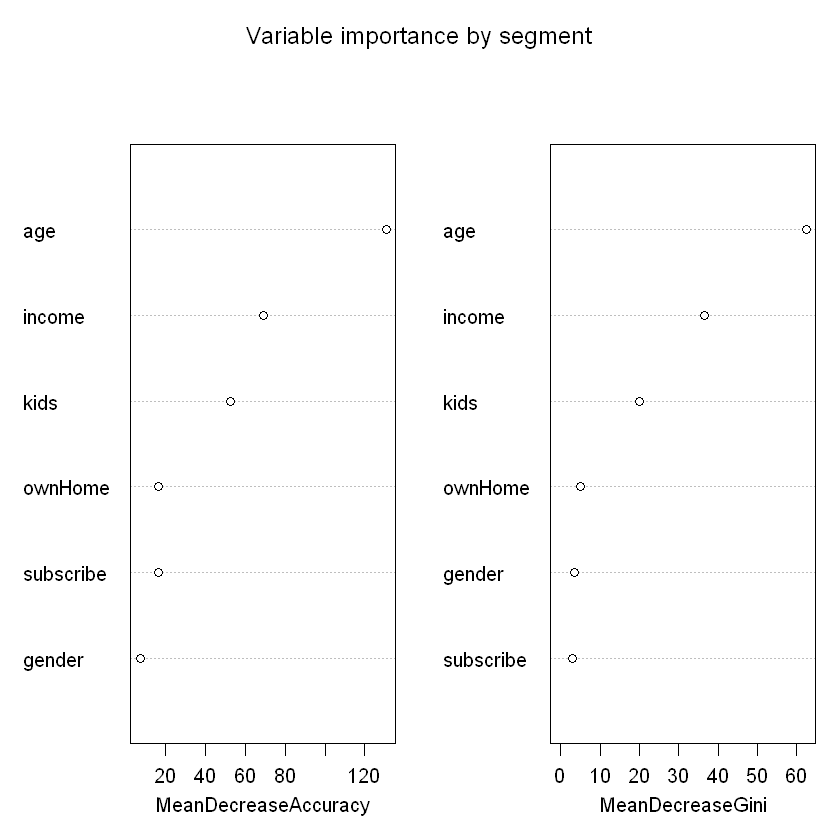

In [107]:
varImpPlot(seg.rf, main="Variable importance by segment")

> The result is Fig. 11.12. The most important variables in this data set are age,
income, and kids.

We plot the importance for variables by segment with information from
importance(MODEL). The variable-by-segment data are in the first four
columns of that object (as shown in the code output above). We transpose it to put
segments on the rows and use heatmap.2() to plot the values with color:

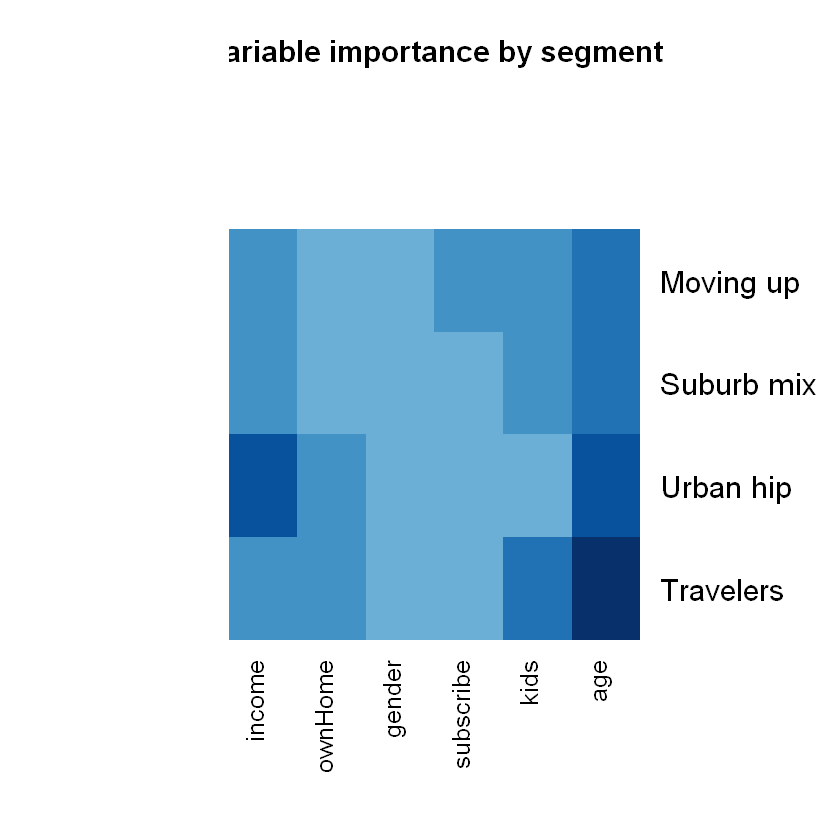

In [109]:
library(gplots)
library(RColorBrewer)
heatmap.2(t(importance(seg.rf)[, 1:4]), 
          col=brewer.pal(9, 'Blues'),
          dend='none', trace='none', key=F,
          margins = c(10,10), 
          main='Variable importance by segment')

> The result is Fig. 11.13. We used the gplots package for heatmap.2(),
and RColorBrewer to get a color palette. 
 - In the call to heatmap.2(),
we specified col=brewer.pal(9, "Blues") to get nine shades of blue,
dend="none", trace="none", key=FALSE to turn off some plot options
we didn’t want (dendrograms and a legend), and margins=c(10, 10) to adjust
the margins and make the axes more readable.

> Darker shades signify
higher importance for the variable
(column) in differentiating a
segment (row).
- Figure 11.13 highlights the importance of age in predicting all of the segments, ***the
importance of income to predict Urban hip, of kids to predict Travelers,*** and the
relatively low importance of the other predictors.

## 11.5 Prediction: Identifying Potential Customers*

We now turn to another use for classification: to predict potential customers. An
important business question—especially in high-churn categories such as mobile
subscriptions—is how to reach new customers.
- If we have data on past prospects
that includes potential predictors such as demographics, and an outcome such as
purchase, we can develop a model to identify customers for whom the outcome is
most likely among new prospects. In this section, we use a random forest model and
attempt to predict subscription status from our data set seg.df.

As usual with classification problems, we split the data into a training sample and a
test sample:

In [110]:
set.seed(92118)
train.prop   = 0.65
train.cases  = sample(nrow(seg.df), nrow(seg.df)*train.prop)
sub.df.train = seg.df[train.cases, ]
sub.df.test  = seg.df[-train.cases, ]

Next, we wonder how difficult it will be to identify potential subscribers. Are
subscribers in the training set well differentiated from non-subscribers? We use
clusplot() to check the differentiation, removing subscribe from the data
with [, -6] and using it instead as the cluster identifier:

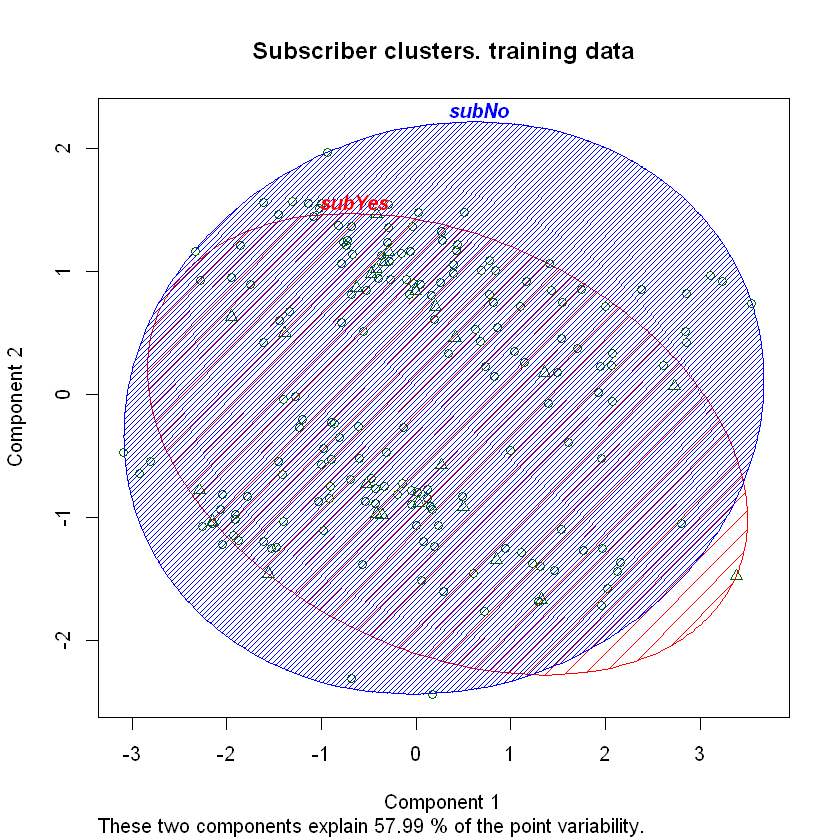

In [111]:
clusplot(sub.df.train[, -6], sub.df.train$subscribe, color=T, shade=T, 
         labels=4, lines=0, main='Subscriber clusters. training data')

> The result in Fig. 11.14 shows that the subscribers and non-subscribers are not well
differentiated when plotted against principal components (which reflect almost 56%
of the variance in the data). This suggests that the problem will be difficult!

We fit an initial RF model to predict subscribe:

In [112]:
set.seed(11954)
(sub.rf = randomForest(subscribe ~ ., data=sub.df.train, ntree=3000))


Call:
 randomForest(formula = subscribe ~ ., data = sub.df.train, ntree = 3000) 
               Type of random forest: classification
                     Number of trees: 3000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 14.36%
Confusion matrix:
       subNo subYes class.error
subNo    167      3  0.01764706
subYes    25      0  1.00000000

>The results are not encouraging. Although the error rate might initially sound good
at 14.36 %, we have 100% error in predicting subscribers (subYes) with all 25
misclassified in the OOB data.
- Why? This demonstrates the class ***imbalance problem*** in machine learning. When
***one category dominates the data***, it is very difficult to learn to predict other groups.
This frequently arises with ***small-proportion problems***, such as predicting the comparatively
rare individuals who will purchase a product, who have a medical condition,
who are security threats, and so forth.
- A general solution is to balance the classes by sampling more from the small group.
In RF models, this can be accomplished by telling the classifier to use a balanced
group when it samples data to fit each tree.

We use sampsize=c(25, 25) to
draw an equal number of subscribers and non-subscribers when fitting each tree
(selecting N = 25 each because we have that many subscribers in the training data;
these are sampled with replacement so trees are not all identical):

In [120]:
set.seed(11954)
(sub.rf = randomForest(subscribe ~ ., data=sub.df.train, ntree=3000, 
                       sampsize=c(25,25)))


Call:
 randomForest(formula = subscribe ~ ., data = sub.df.train, ntree = 3000,      sampsize = c(25, 25)) 
               Type of random forest: classification
                     Number of trees: 3000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 34.36%
Confusion matrix:
       subNo subYes class.error
subNo    120     50   0.2941176
subYes    17      8   0.6800000

> Although our overall error rate is substantially higher at 34.36 %, we are successfully
predicting 32% (i.e., 1−0.68) of the subscribers in the OOB data, which is
greatly improved over zero.

We use predict() to apply the RF model to the holdout data and examine the
confusion matrix:

In [121]:
sub.rf.sub = predict(sub.rf, sub.df.test)
table(sub.rf.sub, sub.df.test$subscribe)

          
sub.rf.sub subNo subYes
    subNo     72      9
    subYes    18      6

>The model correctly predicts 6 of the 15 subscribers in the holdout data, at a cost
of incorrectly predicting 11 others as subscribers who are not. That may be an acceptable
tradeoff if we are trying to identify prospects who are worth an effort to
reach. 
- For instance, in the present case, calling all prospects would result in 15/105
successes (14% success rate), while calling the suggested ones would result in 6/17
successes (35 %). The ultimate value of each strategy—to call of them or not—
depends on the cost of calling vs. the value of successful conversion.

>Another way to look at the result is this: those that the model said were nonsubscribers
were almost 80% correct (72 correct out of 90). If the cost to target
customers is high, it may be very useful to predict those not to target with high
accuracy.

Is the model predicting better than chance? We use adjustedRandIndex()
to find that performance is modestly better than chance, and we confirm this
with cohen.kappa() in the psych package, which provides confidence intervals:

In [122]:
adjustedRandIndex(sub.rf.sub, sub.df.test$subscribe)

[1] 0.09717629

In [124]:
library(psych)

In [125]:
cohen.kappa(cbind(sub.rf.sub, sub.df.test$subscribe))

Warning message in any(abs(bounds)):
"coercing argument of type 'double' to logical"

Call: cohen.kappa1(x = x, w = w, n.obs = n.obs, alpha = alpha, levels = levels)

Cohen Kappa and Weighted Kappa correlation coefficients and confidence boundaries 
                  lower estimate upper
unweighted kappa -0.051     0.16  0.37
weighted kappa   -0.051     0.16  0.37

 Number of subjects = 105 

>With an adjusted Rand Index = 0.097 and Cohen’s kappa = 0.16 (confidence interval
0.025–0.50), the model identifies subscribers in the test data modestly better than
chance.

With a difficult problem—predicting a low incidence group, in data where the
groups are not well-differentiated, and with a small sample—the random forest
model performs modestly yet perhaps surprisingly well. There are no magic bullets
in predictive modeling, but if you use the many tools available in R, avoid pitfalls
such as class imbalance, and interpret results in terms of the business action, you
will have good odds to achieve positive results.